In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [2]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [4]:
bikes.rename(columns={'count':'total'}, inplace=True)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

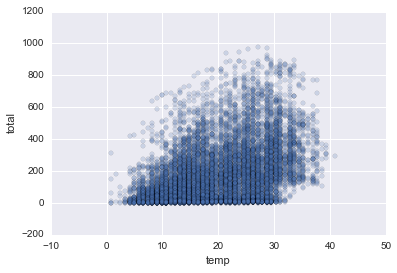

In [7]:
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.2)

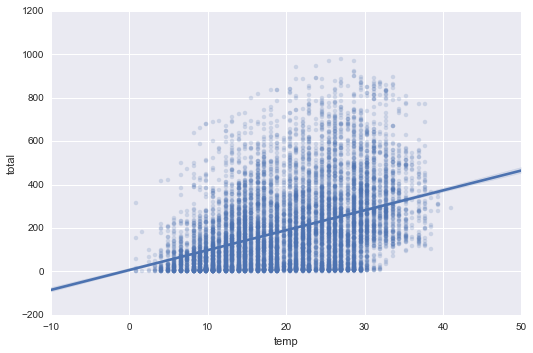

In [9]:
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [11]:
feature_cols=['temp']
X = bikes[feature_cols]
y = bikes.total

In [12]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print(linreg.intercept_)
print(linreg.coef_)

6.04621295962
[ 9.17054048]


In [14]:
linreg.intercept_ + linreg.coef_*25

array([ 235.309725])

In [15]:
linreg.predict(25)

array([ 235.309725])

In [16]:
bikes['tempF'] = bikes.temp*1.8 + 32

In [17]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,tempF
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1,49.712


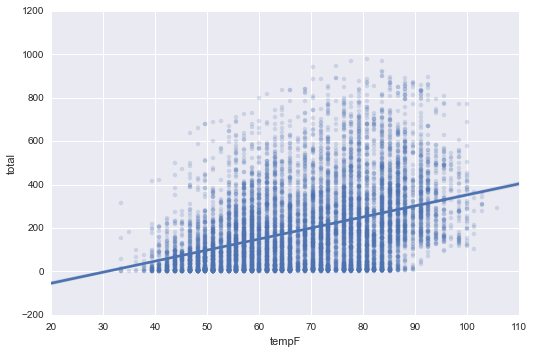

In [18]:
sns.lmplot(x='tempF', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [19]:
feature_cols=['tempF']
X = bikes[feature_cols]
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print(linreg.intercept_)
print(linreg.coef_)

-156.985617821
[ 5.09474471]


In [22]:
linreg.predict(77) #equivalent in F to the earlier C of 25

array([ 235.309725])

In [23]:
bikes.drop('tempF', axis=1, inplace=True)

In [24]:
feature_cols = ['temp', 'season', 'weather', 'humidity']

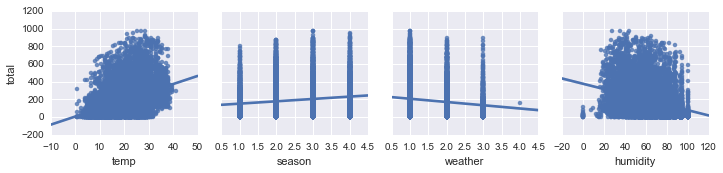

In [25]:
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total', kind='reg')

In [27]:
pd.crosstab(bikes.season, bikes.index.month)

col_0,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


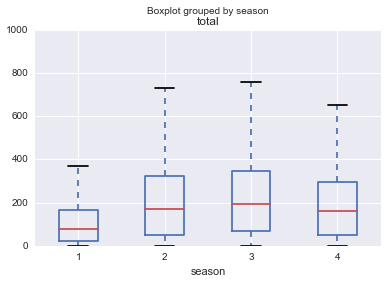

In [29]:
bikes.boxplot(column='total', by='season')

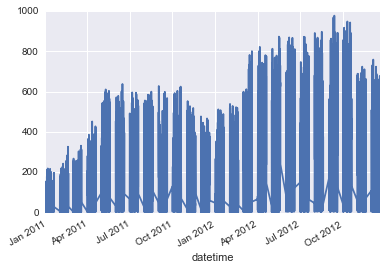

In [31]:
bikes.total.plot()

In [32]:
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


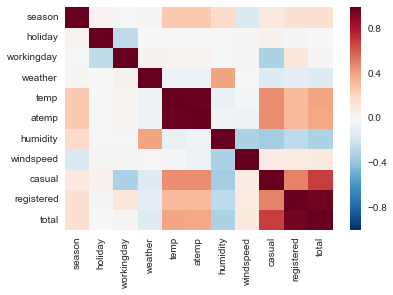

In [33]:
sns.heatmap.(bikes.corr())

In [35]:
feature_cols = ['temp', 'season', 'weather', 'humidity']
X = bikes[feature_cols]
linreg.fit(X,y)
print(linreg.intercept_)
print(linreg.coef_)

159.520687861
[  7.86482499  22.53875753   6.67030204  -3.11887338]


In [39]:
zip(feature_cols, linreg.coef_)

In [42]:
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]


from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(true, pred))
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.0
MSE: 7.5
RMSE: 2.73861278753


In [43]:
from sklearn.cross_validation import train_test_split

def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [45]:
train_test_rmse(['temp', 'season', 'humidity'])

155.59818936691417